In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline
import bs4
import csv
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
def username():
    name = input("Enter your GitHub username:")
    name = [name.replace(" ", "")]
#     print(name)
    return name[0];
def search(name):
    import requests

    url =('https://api.github.com/search/users?q={}'.format(name))
#     print('url: {}'.format(url))
    requestObj = requests.get(url = url)
    data = requestObj.json()
#     print(len(data['items']))
    return data;
def decision(data,name):
    import cliask
    if len(data['items'])>1:
        resp = cliask.agree('We have more than one result on {}\nPlease enter yes or no for this username '.format(name),
                          validator=('yes','no'),
                          invalid_response='You must say yes or no')
    else:
        resp = 1;
    return resp;

def user_info(resp,name): 
    import requests
    if resp == 1:
        url =('https://api.github.com/users/{}'.format(name))
        print('url: {}'.format(url))
        requestObj = requests.get(url = url)
        user_data = requestObj.json()
#         print(user_data.keys())
        return(user_data,name)
    elif resp == 0:
        user_data,name = main()
        return (user_data,name)
def display_info():
    print("Information about user '{}':".format(name1))
    print("ID: {}".format(output['id']))
    print("Email: {}".format(output['email']))
    print("Location: {}".format(output['location']))
    print("Public repos: {}".format(output['public_repos']))
    print("About: {}".format(output['bio']))

In [4]:
def repo_fetch():
    page_no = 1
    url = output['repos_url'] + '?page=' + str(page_no) + '&per_page=100'
    print(url)
    repos_data = []
    while (True):
        requestObj = requests.get(url = url)
        response = requestObj.json()
        repos_data = repos_data + response
        repos_fetched = len(response)
        if (repos_fetched == 100):
            page_no = page_no + 1
            url = output['repos_url'] + '?page=' + str(page_no) + '&per_page=100'
        else:
            print("Total repositories fetched: {}".format(len(repos_data)))
            break
    return(repos_data)

def repo_display(repos_data):
    repos_information = []
    for i, repo in enumerate(repos_data, 1):
        data = []
        data.append(repo['id'])
        data.append(repo['name'])
        data.append(repo['description'])
        data.append(repo['created_at'])
        data.append(repo['updated_at'])
        data.append(repo['owner']['login'])
        data.append(repo['license']['name'] if repo['license'] != None else None)
        data.append(repo['has_wiki'])
        data.append(repo['forks_count'])
        data.append(repo['open_issues_count'])
        data.append(repo['stargazers_count'])
        data.append(repo['watchers_count'])
        data.append(repo['url'])
        data.append(repo['commits_url'].split("{")[0])
        data.append(repo['url'] + '/languages')
        repos_information.append(data)

    import pandas as pd
    repos_df = pd.DataFrame(repos_information, columns = ['Id', 'Name', 'Description', 'Created on', 'Updated on', 
                                                          'Owner', 'License', 'Includes wiki', 'Forks count', 
                                                          'Issues count', 'Stars count', 'Watchers count',
                                                          'Repo URL', 'Commits URL', 'Languages URL'])
    repos_df.head(100)
    
    for i in range (len(repos_data)):
        response = repos_data[i]['language']
        if response == None:
            repos_df.loc[i, 'Languages'] = ""
        else:
            languages = []
            languages.append(response)
            repos_df.loc[i, 'Languages'] = languages
    repos_df.to_csv('repos_info.csv', index = False)
    print("File generated Succesfully")

def language_analysis():
    repos = pd.read_csv('repos_info.csv')
    print("Total repos till date: {}".format(repos.shape[0]))
    list_of_languages = []
    for languages in repos['Languages']:
        if type(languages) == str:
            for language in languages.split(','):
                list_of_languages.append(language.strip())
    languages_count = pd.Series(list_of_languages).value_counts()    
    return(languages_count)

def plot(languages_count):
    plt.figure(figsize = (20, 12))
    sns.barplot(languages_count.index, languages_count.values)
    plt.xlabel("Languages", fontsize = 20)
    plt.xticks(rotation = 90)
    plt.ylabel("Number of Repositories", fontsize = 20)
    plt.title("Language distribution amongst all repositories", fontsize = 20)
    
def lan():
    exp =[]
    for i in range(len(languages_count)):
        exp.append(languages_count.index[i])
    lan = []
    for i in exp:
        i = i.replace(" ", "")
        lan.append(i)
    location = output['location'].partition(', ')
    for i in range(len(lan)):
        if i == 0:
            lin = lan[i] + str('+')
        else:
            lin = lin + lan[i] + str('+')
    return(lin,exp,location)

In [5]:
import cliask
def scrap(output,location,roll=1):
    if roll==1:
        resp = cliask.agree('Do you want to work only in {} '.format(location[0]),
                              validator=('yes','no'),
                              invalid_response='You must say yes or no')
    if roll ==1:
        if resp == 0:
            url = ("https://stackoverflow.com/jobs?r=true&tl={}&sort=i".format(lin))
        elif resp == 1:
            url = ("https://stackoverflow.com/jobs?l={}&d=100&u=Km&tl={}&sort=i".format(location[0],lin))
    else:
        url = ("https://stackoverflow.com/jobs?l={}&d=1000&u=Km&tl={}&sort=i".format(location[0],lin))
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")
    return(soup)
#     print(soup.prettify())

In [6]:
def process_data(soup):
    title = []
    comp =[]
    place = []
    link =[]
    post_day =[]
    tags=[]
    job_id= []
    for sea in soup.find_all(name='div', attrs={"class":"js-search-title -header h4 seo-header"}):
        for s in sea.find_all(name='span', attrs={"class":"description"}):
            b = (s.text)
    #         print("resuls found:", b.strip())
    for div in soup.find_all(name='div', attrs={"class":"listResults"}):
        for dd in div.find_all(name='div', attrs={"class":"dismiss-trigger js-dismiss-job ps-absolute r12 fc-black-500 c-pointer"}):
            job_id.append(dd['data-id'])
        for t in div.find_all(name='div', attrs={"class": "fc-black-700 fs-body1 -company"}):
            comp.append((t.span.text))
            for p in t.find_all(name='span',attrs={"class":"fc-black-500"}):
                place.append((p.text.splitlines()))
        for t in div.find_all(name='div', attrs={"class": "-title"}):
            for h in t.find_all(name='h2', attrs={"class":"fs-body2 job-details__spaced mb4"}):
                for aclass in h.find_all(name="a", attrs={"class":"s-link s-link__visited job-link"}):
                    l = 'https://stackoverflow.com' + (aclass['href'])
                    link.append(l)
                    title.append(aclass['title'])
            for day in t.find_all(name='span', attrs={"class":"fc-black-500"}):
                post_day.append(day.text)

    for t in soup.find_all(name='div', attrs={"class":"mt12 -tags"}):
        temp_tag=[]
        for ta in t.find_all(name='a', attrs={"class":"post-tag job-link no-tag-menu"}):
            temp_tag.append(ta.text)
        pre_final =[]
        for j,enu in enumerate(temp_tag):
            pre_final.append(enu)
        tags.append(pre_final)
    # print((tags))

    employer = [x.strip() for x in comp]
    job_place = [y[2] for y in place]
    ab = b.strip()
    c = ab.split()
    c[0] = c[0].replace(",","")
    results = int(c[0])
    jobs =[]
    if results == 0:
        print("No results found in your city but here are some jobs near your city")
    else:
        for i in range(len(title)):
            if i == 0:
                print("Results found:",b.strip())
            elif i == results:
                print("\nRelevant jobs you may be interested:")
            print("\n{} Job title: {}".format(i+1,title[i]))
            print("Company Name: ",employer[i])
            print("Company Location: ",job_place[i].strip())
            print("Tags: ",tags[i])
            print("Post day: ",(post_day[i]))
            print("Job ID: ",job_id[i])
            print("Post Link: ",(link[i]))
    return(results)


In [7]:
def dataset(exp):
    jobs = pd.read_csv('indeed_job_dataset.csv')
    print("Total Jobs retrieved: {}".format(jobs.shape[0]))

    title = jobs['Job_Title']
    tags = jobs['Skill']
    company = jobs['Company']

    import string
    skill = []
    tt=[]
    for i in range(len(tags)):
        if str(tags[i]) == 'nan':
            continue
        else:
            t1 = tags[i].replace("[", "")
            t2 = t1.replace("]","")
            t3 = t2.replace("'","")
            tt.append((t3.split(",")))
    for num,i in enumerate(tt):
        m=[]
        for l in i:
            m.append(l.strip())
        skill.append(m)

    rank = []
    for i in range(len(skill)):
        match = 0
        for j in range(len(skill[i])):
            if skill[i][j] in exp:
                match = match+1
        rank.append(match/len(skill[i]))
    #     print("match found for {} is {} out of {}".format(i,match,len(skill[i])))
    # print("Rank: ",rank.index(max(rank)))
    # print("tag match: ",skill[rank.index(max(rank))])

    arr = np.array(rank)
    top_fif = arr.argsort()[-50:][::-1]

    out=[]
    for i in top_fif:
        lan=[]
        lan.append(jobs['Job_Title'][i])
        lan.append(skill[i])
        lan.append(company[i])
        lan.append(jobs['No_of_Stars'][i])
        lan.append(jobs['Company_Industry'][i])
        out.append(lan)
    return(out)  

In [31]:
def main():
    name = username();
    data = search(name);
    resp = decision(data,name);
    output,name1 = user_info(resp,name)
    return (output,name1)
output,name1 = main()
display_info()

Enter your GitHub username:petertodd
We have more than one result on petertodd
Please enter yes or no for this username yes
url: https://api.github.com/users/petertodd
Information about user 'petertodd':
ID: 7042
Email: None
Location: Toronto
Public repos: 119
About: Applied Cryptography Consultant (what the cool kids call 'blockchain tech')


https://api.github.com/users/petertodd/repos?page=1&per_page=100
Total repositories fetched: 119
File generated Succesfully
Total repos till date: 119


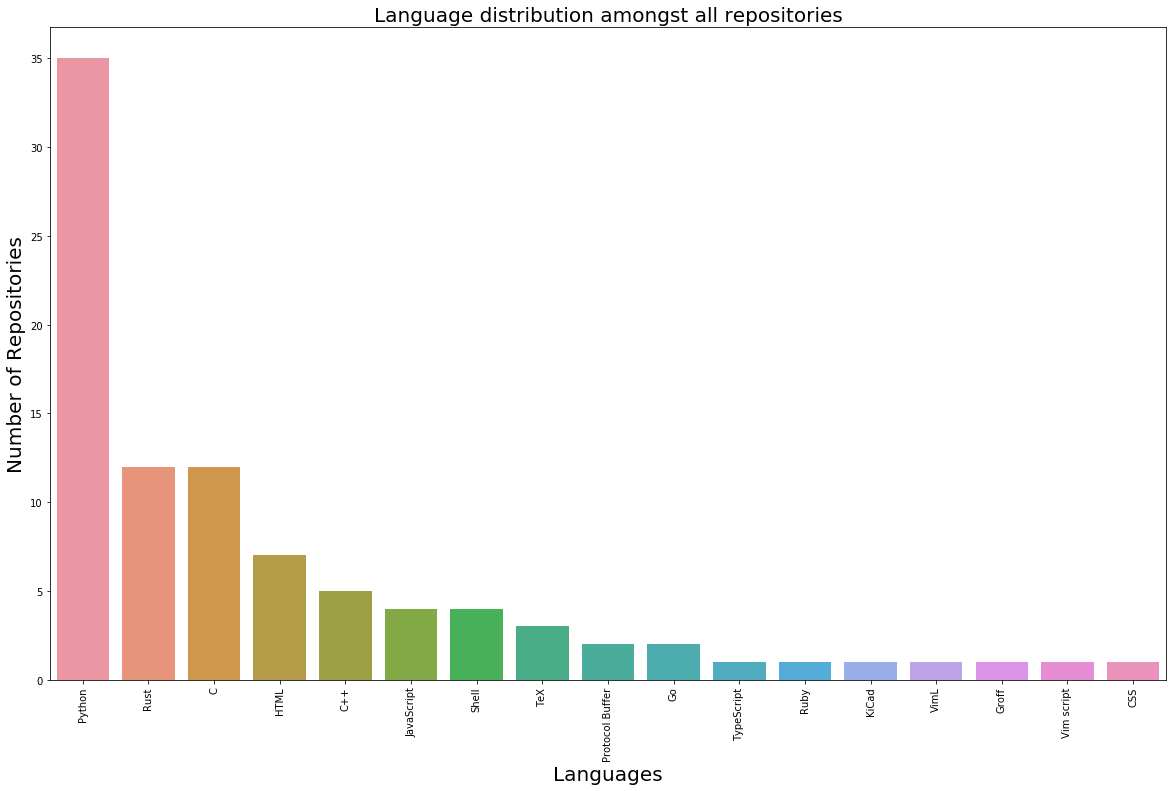

In [28]:
repos_data = repo_fetch()
repo_display(repos_data)
languages_count = language_analysis()
plot(languages_count)

In [29]:
(lin,exp,location) = lan()
soup = scrap(output,location)
results = process_data(soup)
if results == 0:
    soup1 = scrap(output,location,roll=2)
    results = process_data(soup1)

Do you want to work only in Toronto yes
https://stackoverflow.com/jobs?l=Toronto&d=100&u=Km&tl=Python+Rust+C+HTML+C+++JavaScript+Shell+TeX+ProtocolBuffer+Go+TypeScript+Ruby+KiCad+VimL+Groff+Vimscript+CSS+&sort=i
Results found: 23 jobs

1 Job title: Java Developer
Company Name:  Critical Mass
Company Location:  Toronto, ON, Canada
Tags:  ['java', 'rest', 'javascript', 'sql', 'css']
Post day:  29d ago
Job ID:  305606
Post Link:  https://stackoverflow.com/jobs/305606/java-developer-critical-mass

2 Job title: Software Development Engineer - AWS Aurora
Company Name:  Amazon
Company Location:  Toronto, ON, Canada
Tags:  ['c++', 'mysql', 'amazon-rds-aurora', 'c']
Post day:  2d ago
Job ID:  296543
Post Link:  https://stackoverflow.com/jobs/296543/software-development-engineer-aws-aurora-amazon

3 Job title: ETL Developer / Data Engineer for a growing SAAS company
Company Name:  Rethink Solutions
Company Location:  Toronto, ON, Canada
Tags:  ['java', 'etl', 'sql', 'talend', 'python']
Post day:

IndexError: list index out of range

In [32]:
out = dataset(exp)
tag_df = pd.DataFrame(out,index = np.arange(1,len(out)+1),columns = ['Job Title','Skill','Company','Stars','Industry'])
tag_df.head(100)

Total Jobs retrieved: 5715


,Job Title,Skill,Company,Stars,Industry
1,Data Engineer,"[Ruby, Python]",Elder Research Inc,NaN,NaN
2,Digital Analytics Analyst,"[JavaScript, Python]",PureCars,3.6,NaN
3,Data Analyst II,[JavaScript],Clayton Homes,3.6,Construction
4,Artificial Intelligence Expert (Data Scientist),[Python],BASF,4.2,Industrial Manufacturing
5,Data Analyst (Infection Control),[CSS],RWJBarnabas Health,4.0,Health Care
6,Data Scientist/Database Architect,[Python],ManTech International Corporation,4.0,Aerospace and Defense
7,Associate Data Analyst,[Python],The Hanover Insurance Group,3.8,Insurance
8,Data Engineer,"[Ruby, Python]",Booz Allen Hamilton,3.9,Consulting and Business Services
9,Data Analyst,[Python],"Child Care Resource Center – Chatsworth, CA",NaN,NaN
10,SAP Concur - Sr. Director Product Analytics,[Python],SAP,4.3,Internet and Software
